[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\annah\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


---------------------------------------------------
1952.txt
---------------------------------------------------
1953.txt
---------------------------------------------------
1954.txt
uneventful 0
nazareth 0
---------------------------------------------------
1955.txt
undiscovered 0
maori 0
---------------------------------------------------
1956.txt
---------------------------------------------------
1957.txt
---------------------------------------------------
1958.txt
---------------------------------------------------
1959.txt
sandringham 0


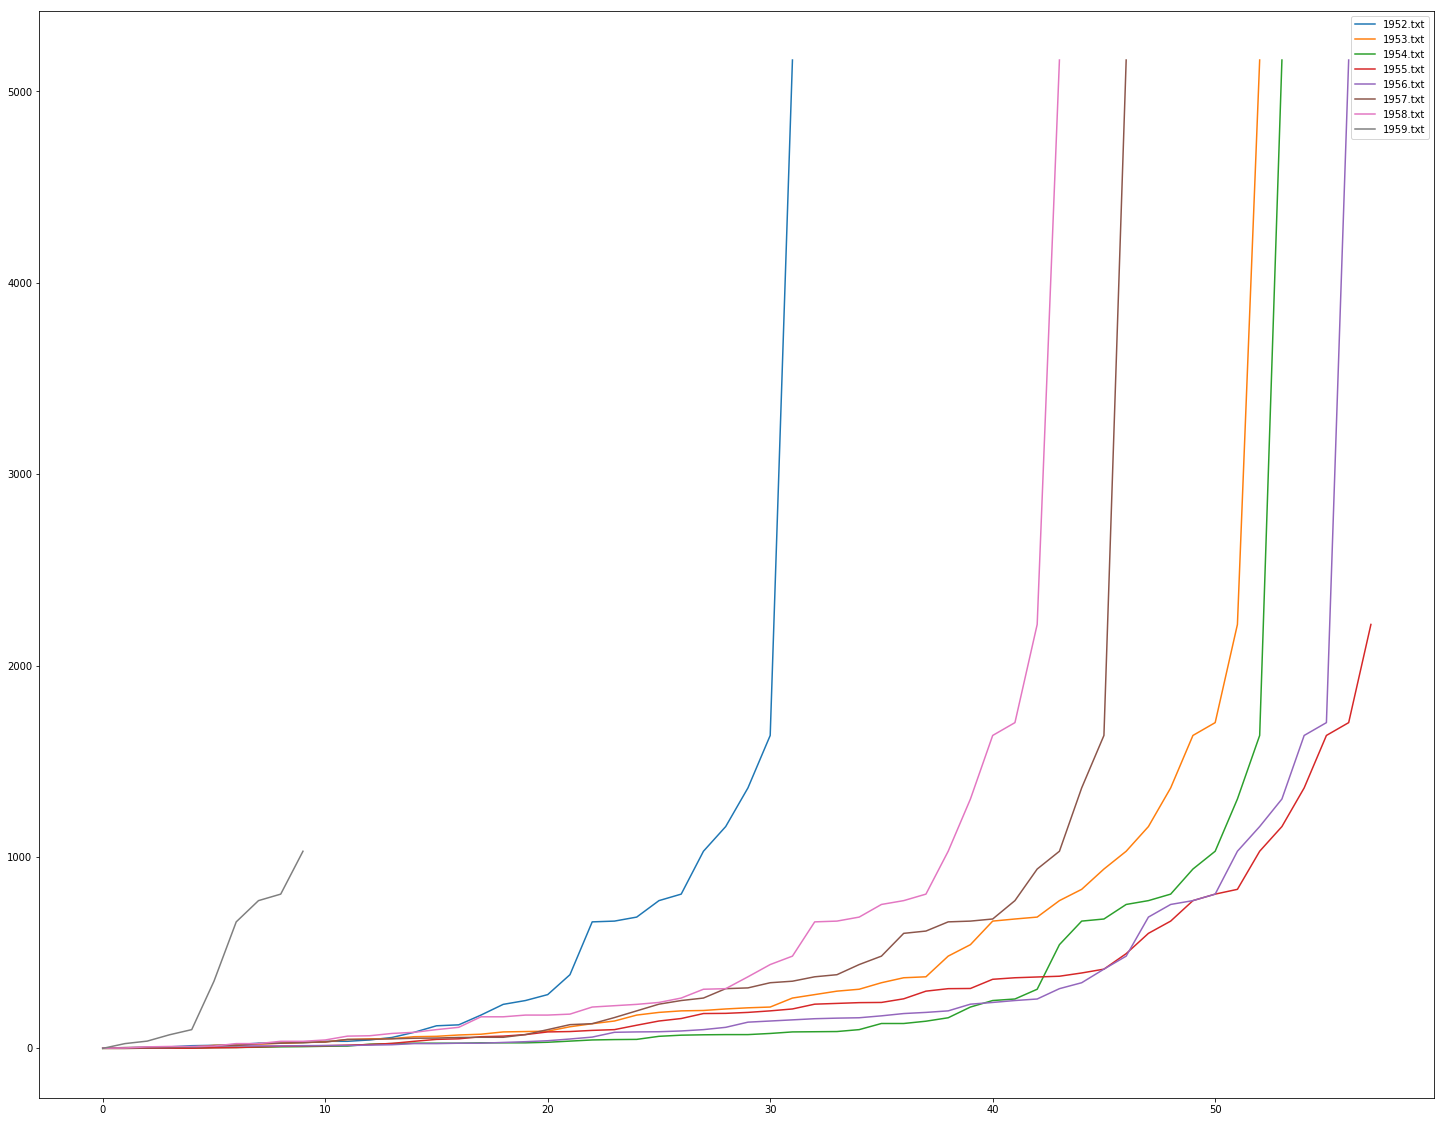

---------------------------------------------------
1960.txt
---------------------------------------------------
1961.txt
---------------------------------------------------
1962.txt
neighbour 0
---------------------------------------------------
1963.txt
honourable 0
undernourished 0
---------------------------------------------------
1964.txt
noisiest 0
---------------------------------------------------
1965.txt
stabilising 0
---------------------------------------------------
1966.txt
---------------------------------------------------
1967.txt
expo 0
redoubtable 0
---------------------------------------------------
1968.txt
---------------------------------------------------
1969.txt


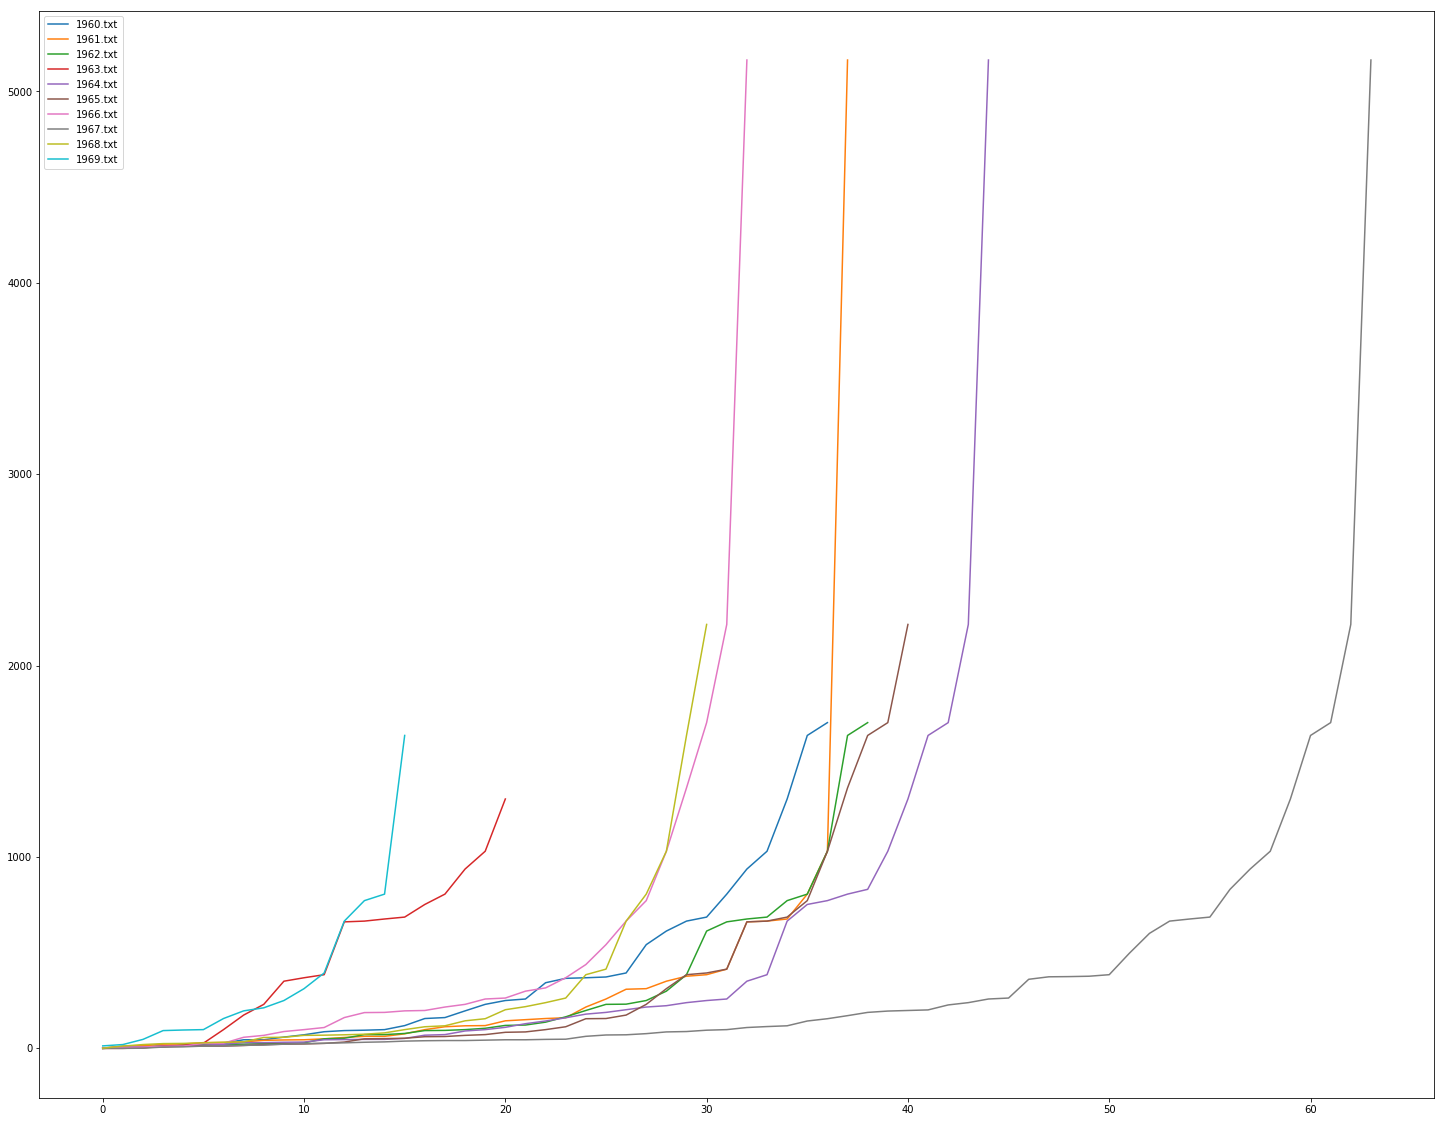

---------------------------------------------------
1970.txt
tonga 0
unpublicised 0
---------------------------------------------------
1971.txt
---------------------------------------------------
1972.txt
civilised 0
---------------------------------------------------
1973.txt
---------------------------------------------------
1974.txt
---------------------------------------------------
1975.txt
---------------------------------------------------
1976.txt
bicentennial 0
---------------------------------------------------
1977.txt
buckingham 0
jubilee 0
---------------------------------------------------
1978.txt
civilised 0
---------------------------------------------------
1979.txt
homeless 0


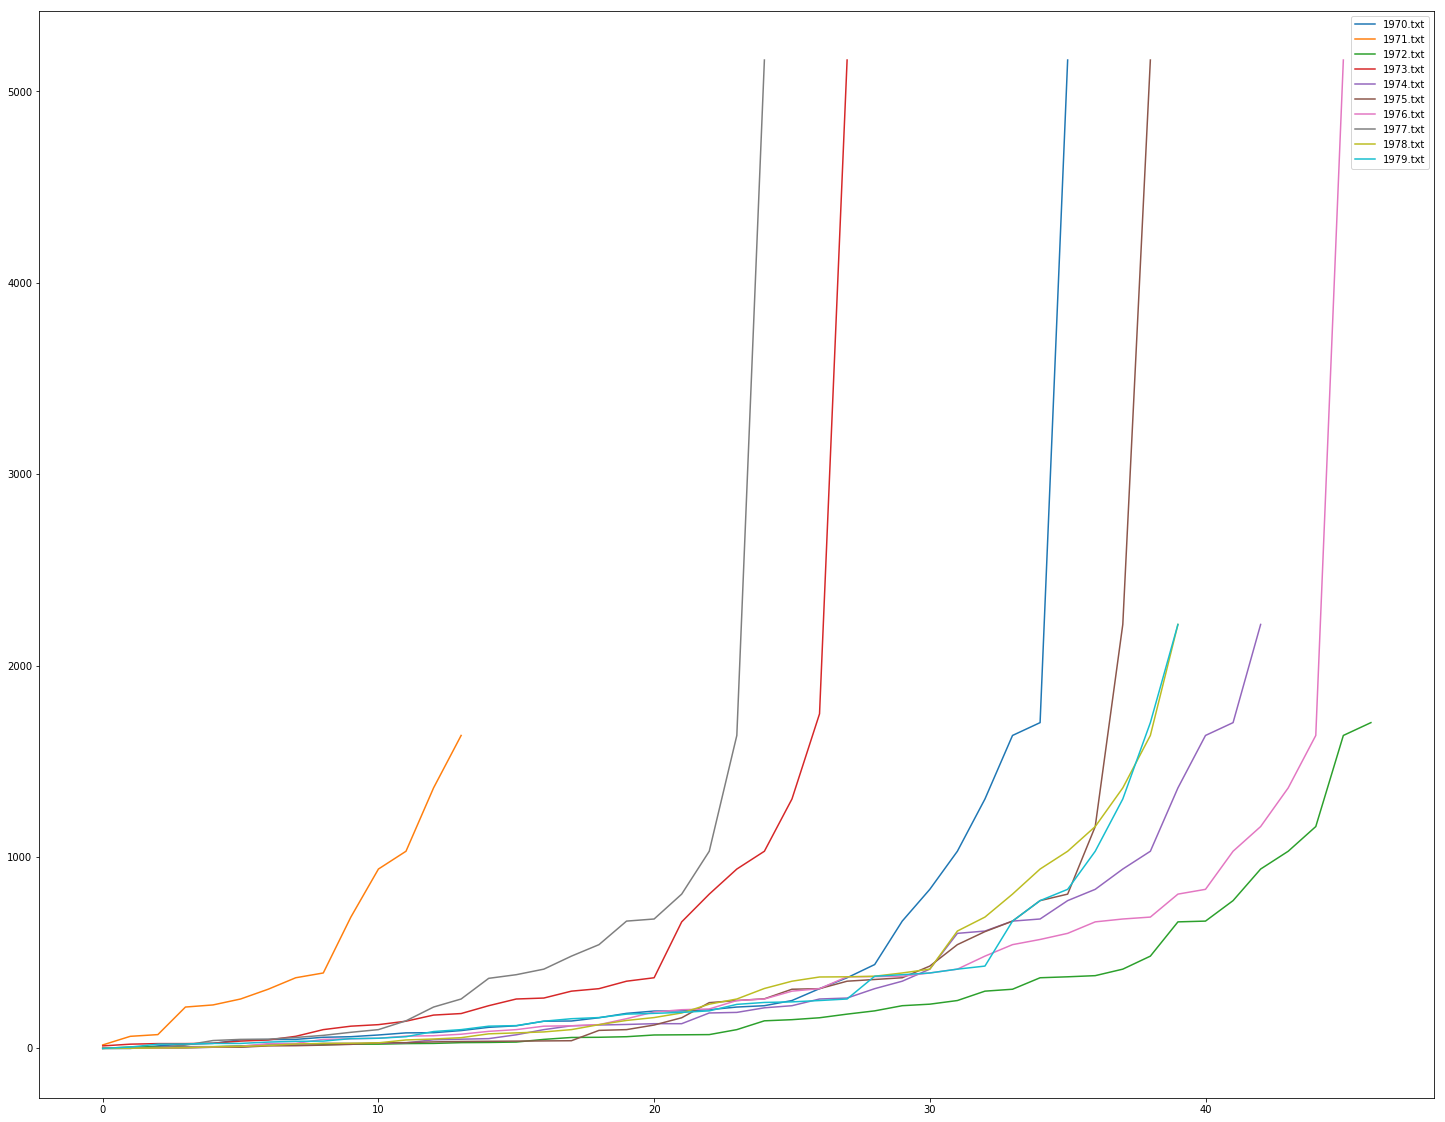

---------------------------------------------------
1980.txt
civilised 0
kindlier 0
---------------------------------------------------
1981.txt
disablement 0
---------------------------------------------------
1982.txt
bbc 0
---------------------------------------------------
1983.txt
kenya 0
papua 0
warmest 0
---------------------------------------------------
1984.txt
grandchild 0
unbridgeable 0
---------------------------------------------------
1985.txt
buckingham 0
unrecognised 0
---------------------------------------------------
1986.txt
buckingham 0
---------------------------------------------------
1987.txt
---------------------------------------------------
1988.txt
bicentennial 0
unloved 0
---------------------------------------------------
1989.txt
neighbourly 0
neighbour 0


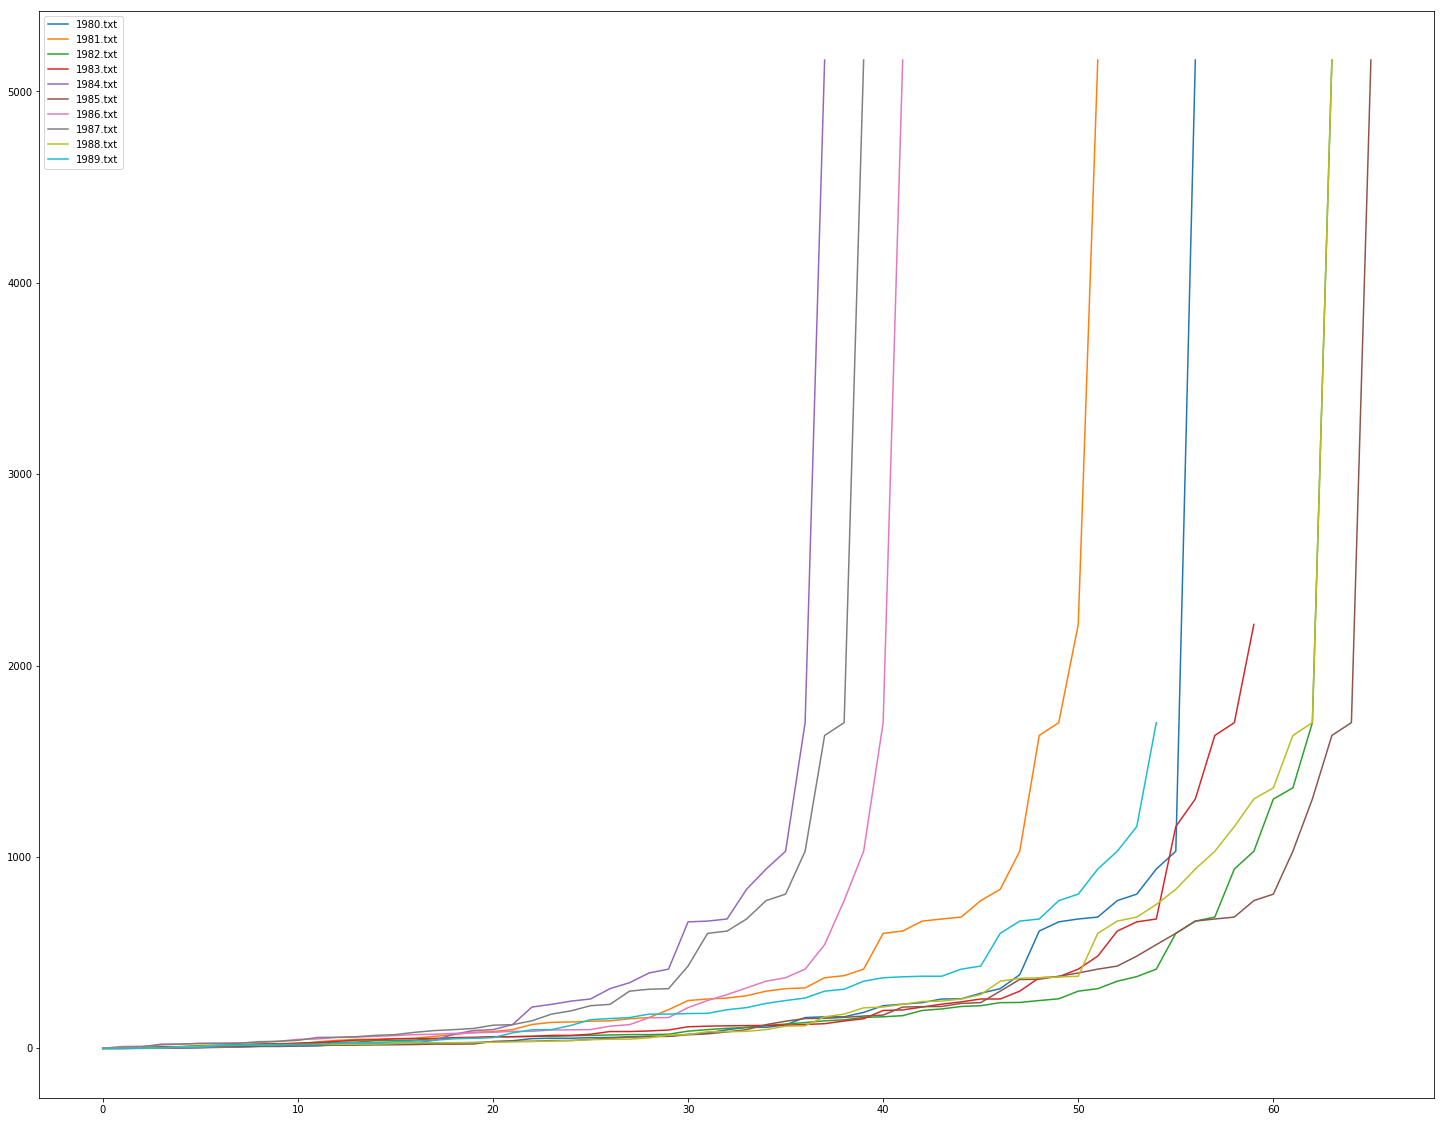

---------------------------------------------------
1990.txt
grandchild 0
stoical 0
unprovoked 0
---------------------------------------------------
1991.txt
unselfishness 0
fortieth 0
---------------------------------------------------
1992.txt
buckingham 0
sandringham 0
grandchild 0
---------------------------------------------------
1993.txt
sandringham 0
---------------------------------------------------
1994.txt
---------------------------------------------------
1995.txt
ve 0
---------------------------------------------------
1996.txt
norwich 0
maundy 0
---------------------------------------------------
1997.txt
buckingham 0
edinburgh 0
---------------------------------------------------
1998.txt
buckingham 0
edinburgh 0
---------------------------------------------------
1999.txt


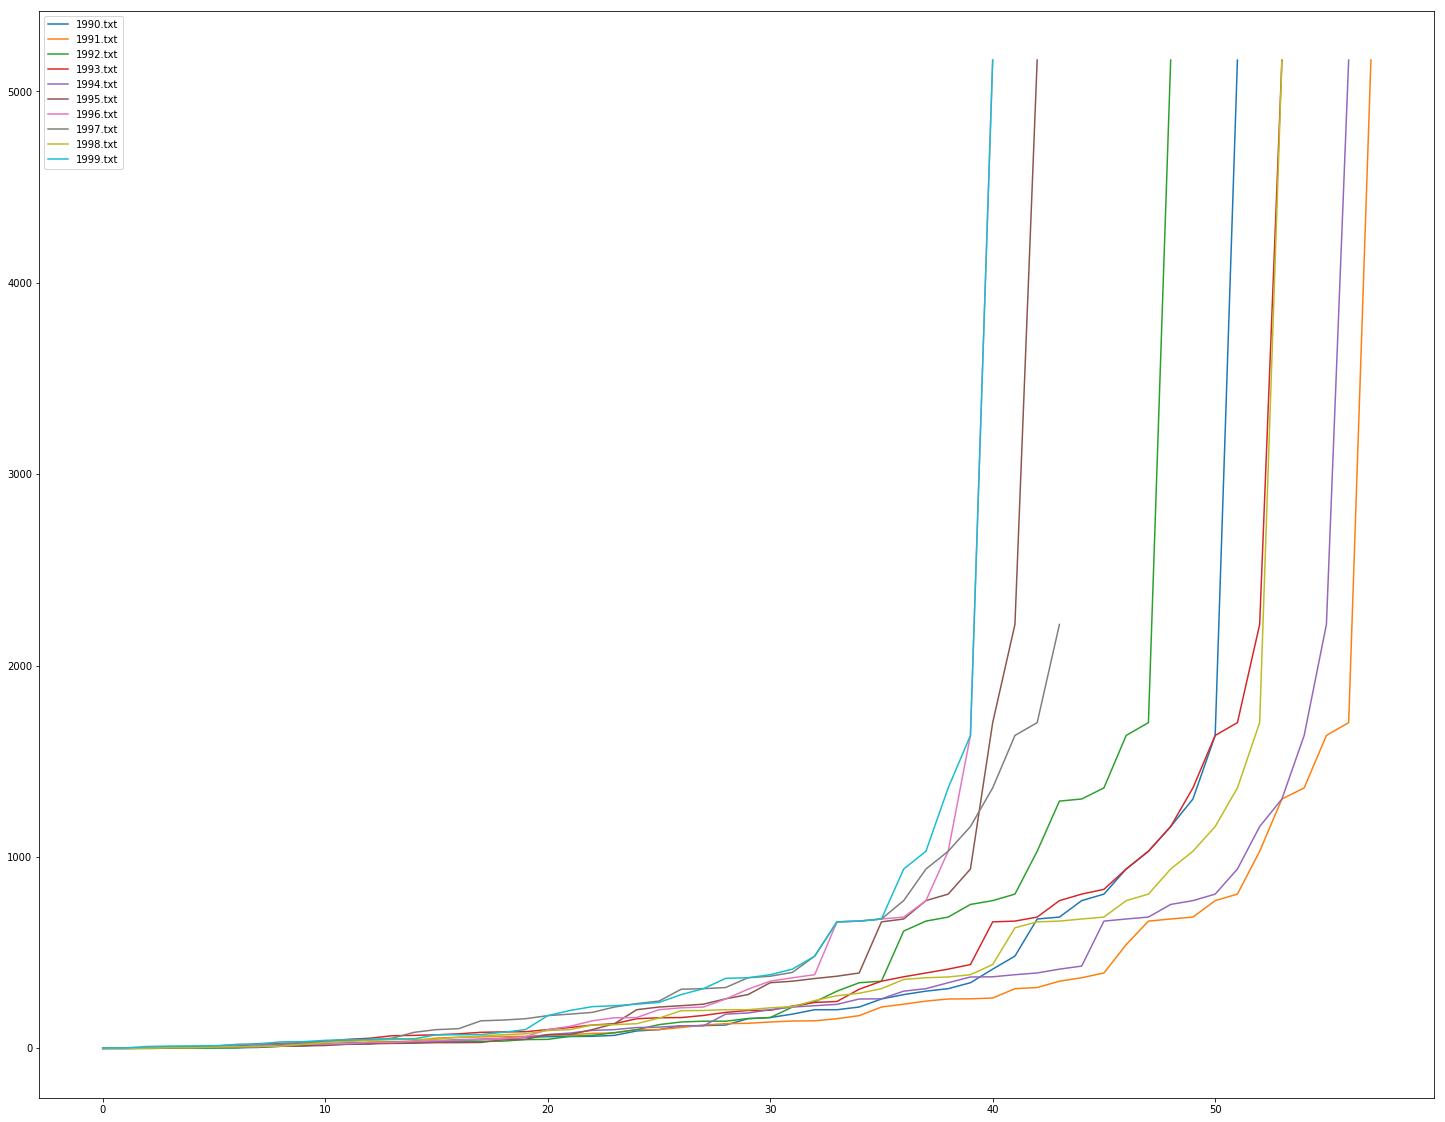

---------------------------------------------------
2000.txt
---------------------------------------------------
2001.txt
terrorist 0
---------------------------------------------------
2002.txt
---------------------------------------------------
2003.txt
---------------------------------------------------
2004.txt
neighbour 0
---------------------------------------------------
2005.txt
---------------------------------------------------
2006.txt
unfamiliarity 0
eightieth 0
---------------------------------------------------
2007.txt
disadvantaged 0
civilised 0
unrewarded 0
unloved 0
---------------------------------------------------
2008.txt
buckingham 0
---------------------------------------------------
2009.txt
bewildering 0


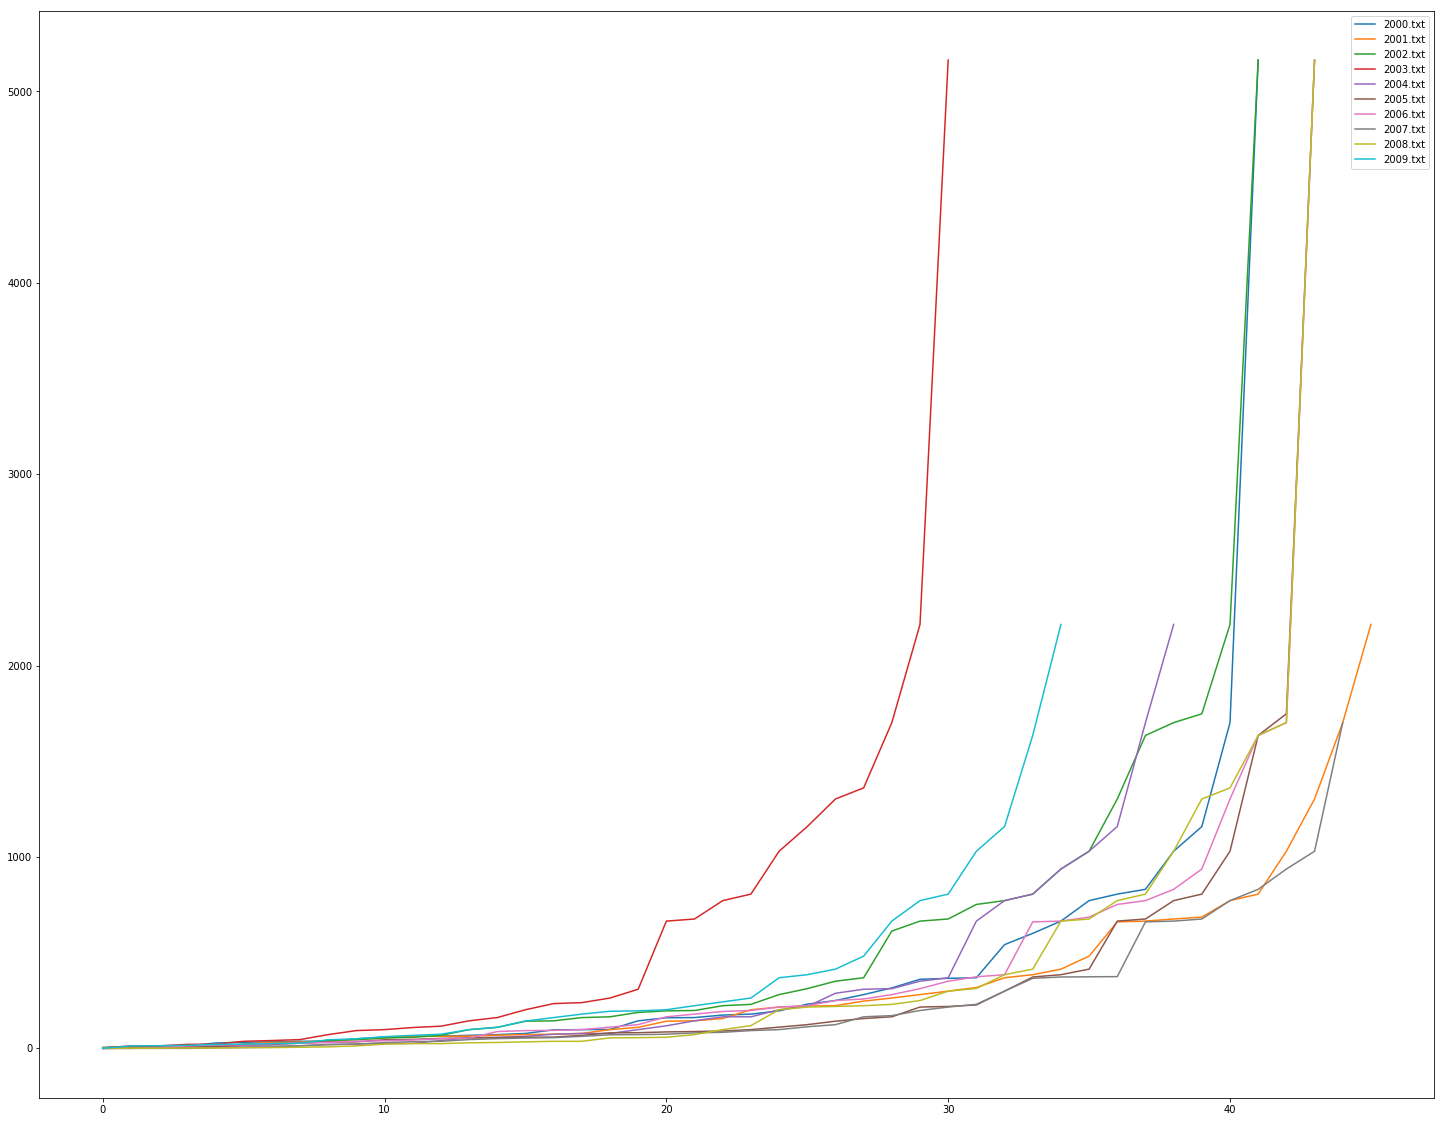

---------------------------------------------------
2010.txt
---------------------------------------------------
2011.txt
---------------------------------------------------
2012.txt
paralympic 0
dutiful 0
midwinter 0
---------------------------------------------------
2013.txt
---------------------------------------------------
2014.txt
---------------------------------------------------
2015.txt
vj 0
---------------------------------------------------
2016.txt
anglian 0
humblest 0
---------------------------------------------------
2017.txt
favourite 0
---------------------------------------------------
2018.txt


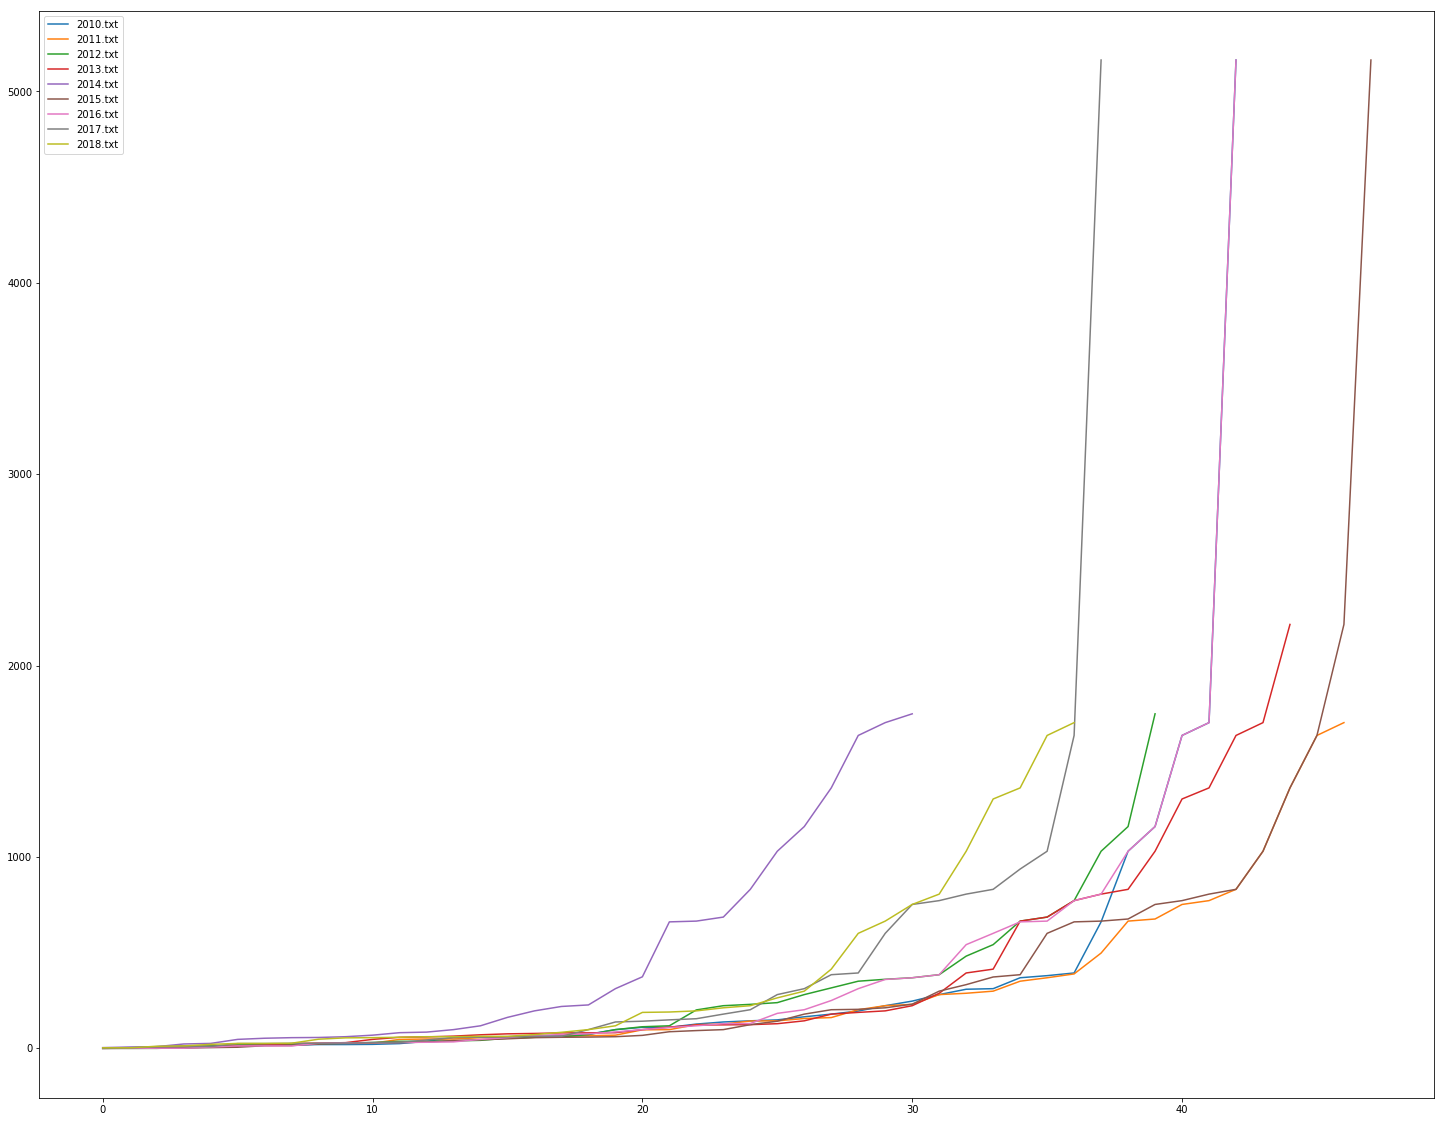

fdist
<FreqDist with 49815 samples and 1161192 outcomes>
len
49815
total_len
536


In [3]:
#TODO: CHANGE TO BRITISH NATIONAL CORPUS

#because of errors in different stages of cleaning etc, it requires "eye-balling" after

#must read over results to delete the non-choice words, (e.g. 'names' of places)
#e.g. results are skewed in a speech where many cities/places are mentioned
#this, however, doesn't reflect word-choice 


from __future__ import division
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import nltk
import os
import string
from nltk.corpus import brown
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from nltk.stem import WordNetLemmatizer

#full version with plots etc is in pycharm on university computer

def main():
    nltk.download('brown')
    
    newcorpus = PlaintextCorpusReader('data', '.*')
    files = newcorpus.fileids()
    text = brown.words()
    fdist = nltk.FreqDist(w.lower() for w in text)
    
    # define punctuation
    punctuations = '''!()-–[]{};:'"“”\,<>’./?@#$%^&*_~'''

    #get rid of punctuation and lemmatise first 
    
    lemmatizer = WordNetLemmatizer()
    
    count = 0
    
    for f in files:
        print('---------------------------------------------------')
        print(f)
        adj_list = []
        adj_freq = []
        
        #access and clean data
        #get raw text
        raw_text = newcorpus.raw(f)
        
        #get words (between white spaces)
        words = raw_text.split()
        
        #strip punctuation
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in words]
        
        #strip non-alphabetics
        alpha_stripped = [word for word in stripped if word.isalpha()]
        
        #convert everything to lower case
        lower_stripped = [word.lower() for word in alpha_stripped]
                
        #lemmatise
        list_v = ([lemmatizer.lemmatize(t) for t in lower_stripped])
        
        #convert list back to string
        str1 = ' '.join(list_v)
        
        text = nltk.word_tokenize(str1)
        pos_words = nltk.pos_tag(text)
            
        #ADD LAYER OF CLEARING PUNCTUATION / NUMBERS / THINGS THAT WILL SKEW RESULTS 
        
        for words in pos_words:            
            if (words[1] == 'JJ' or words[1] == 'JJR' or words[1] == 'JJS') \
            and words[0] not in punctuations: 
                adj_list.append(words[0])
            
            
        abs_freq_list = {}
        fdist_queen = nltk.FreqDist(w.lower() for w in newcorpus.words(f))
        for l in fdist_queen:
            if l in adj_list:
                frequency = fdist[l]
                abs_freq_list.update({l : frequency}) 
                adj_freq.append(frequency)
        
        #abs_freq_list.sort()
        
        adj_freq.sort()
        #print (abs_freq_list)
        #print (adj_freq)
        
        for num in range(1):
            for k, v in abs_freq_list.items():
                if v == num:
                    print(k, v)
        
        
        count += 1
        
        fig_size = plt.rcParams["figure.figsize"]
        fig_size[0] = 25
        fig_size[1] = 20
        plt.rcParams["figure.figsize"] = fig_size
        plt2.rcParams["figure.figsize"] = fig_size
        

        #below outputs a graph per decade of overall adjective frequency distribution 
        if count <= 8:
            plt.plot(adj_freq, label = f)
            plt.legend()
            if count == 8:
                plt.show()
        
            #plt.show()
        if count > 8 and count <= 18:
            plt2.plot(adj_freq, label = f)
            plt2.legend()
            if count == 18:
                plt2.show()
        
        if count > 18 and count <= 28:
            plt2.plot(adj_freq, label = f)
            plt2.legend()
            if count == 28:
                plt2.show()
        
        if count > 28 and count <= 38:
            plt2.plot(adj_freq, label = f)
            plt2.legend()
            if count == 38:
                plt2.show()
        
        if count > 38 and count <= 48:
            plt2.plot(adj_freq, label = f)
            plt2.legend()
            if count == 48:
                plt2.show()
        
        if count > 48 and count <= 58:
            plt2.plot(adj_freq, label = f)
            plt2.legend()
            if count == 58:
                plt2.show()
        
        if count > 58: 
            plt2.plot(adj_freq, label = f)
            plt2.legend()
            
    plt2.show()
        
    
    #plt.show()    
    #plt2.show()
    print('fdist')
    print(fdist)
    print('len')
    print(len(fdist))
    print('total_len')
    print(len(text))


if __name__ == "__main__":
    
    main()

